In [1]:
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
main_path = './setTraining/select_noOhe/'
train = np.load(main_path+'train.npy')
test = np.load(main_path+'test.npy')
y_train = np.load(main_path+'y_train.npy')
y_test = np.load(main_path+'y_test.npy')
print('shapes: train = {}, y_train = {}, test = {}, y_teste = {}'.format(train.shape,y_train.shape,test.shape,y_test.shape))

shapes: train = (17389, 12), y_train = (17389, 1), test = (8566, 12), y_teste = (8566, 1)


In [11]:
# standardscaler x data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_trainScaled = sc_x.fit_transform(train)
X_testScaled = sc_x.fit_transform(test)

## Logistic Regression

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [17]:
y = np.ravel(y_train)
print(y.shape)

(17389,)


In [20]:
num_folds = 10
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, X_trainScaled,y, cv=kfold)
print(results.mean())
score_LogisticRegression = results.mean()

c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver

0.5290700844565642


c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X_trainScaled,y, cv=kfold)
print(results.mean())
scoreLDA = results.mean()

0.5203294289073982


## K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
results = cross_val_score(model, X_trainScaled,y, cv=kfold)
print(results.mean())
scoreKN = results.mean()

0.9162693531128759


## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
results = cross_val_score(model, X_trainScaled,y, cv=kfold)
print(results.mean())
scoreNB = results.mean()

0.2335969443968367


## Regression Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
results = cross_val_score(model, X_trainScaled,y, cv=kfold)
print(results.mean())
scoreRT = results.mean()

0.9045958452637688


## Support Vector Machines

In [32]:
from sklearn.svm import SVC
model = SVC()
results = cross_val_score(model, X_trainScaled,y, cv=kfold)
print(results.mean())
scoreSVM = results.mean()

0.6267183962847847


In [33]:
print("scores --- Log Regression = {}, Linear Discriminant Analysis = {}, K-Nearest Neighbors = {}, Naive Bayes = {}"
      .format(score_LogisticRegression, scoreLDA, scoreKN, scoreNB))
print("Regression Trees = {}, Support vector Machines = {}"
      .format(scoreRT, scoreSVM))

scores --- Log Regression = 0.5290700844565642, Linear Discriminant Analysis = 0.5203294289073982, K-Nearest Neighbors = 0.9162693531128759, Naive Bayes = 0.2335969443968367
Regression Trees = 0.9045958452637688, Support vector Machines = 0.6267183962847847


## Compare machine learning algorithms

c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\tcnew\onedrive\documentos\doutorado\07_udemy\soft_sensors\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver

LR: 0.529070 (0.008224)
LDA: 0.520329 (0.015476)
KNN: 0.916269 (0.006672)
DT: 0.903676 (0.011769)
NB: 0.233597 (0.011642)
SVM: 0.626718 (0.009631)


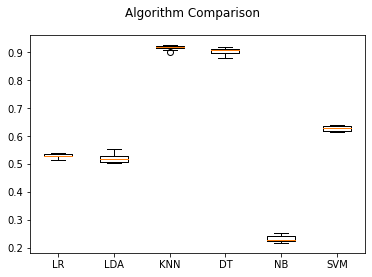

In [37]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits =10,random_state=7,shuffle=True)
    cv_results = cross_val_score(model,X_trainScaled,y, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)
#boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()